In [49]:
from surprise import KNNWithMeans, KNNBasic,SVD, SVDpp
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split, cross_validate

import pandas as pd

In [6]:
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

In [9]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [54]:
movies_with_ratings = movies.join(ratings.set_index('movieId'), on='movieId').reset_index(drop=True)
movies_with_ratings.dropna(inplace=True)

In [55]:
dataset=movies_with_ratings[['userId','title','rating']]
dataset.head()

,userId,title,rating
0,1.0,Toy Story (1995),4.0
1,5.0,Toy Story (1995),4.0
2,7.0,Toy Story (1995),4.5
3,15.0,Toy Story (1995),2.5
4,17.0,Toy Story (1995),4.5


In [56]:
ratings.rating.min()

0.5

In [57]:
ratings.rating.max()

5.0

In [58]:
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(dataset, reader)

In [69]:
trainset, testset = train_test_split(data, test_size=.15)

In [60]:
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [61]:
test_pred = algo.test(testset)

In [62]:
accuracy.rmse(test_pred, verbose=True)

RMSE: 0.8900


0.8900386109681602

In [63]:
algo.predict(uid=2, iid='Fight Club (1999)')

Prediction(uid=2, iid='Fight Club (1999)', r_ui=None, est=4.371095632571377, details={'actual_k': 50, 'was_impossible': False})

Исходя из данных приведенных ниже, самый точный SVDpp, но по времени он затрачивает в разы больше
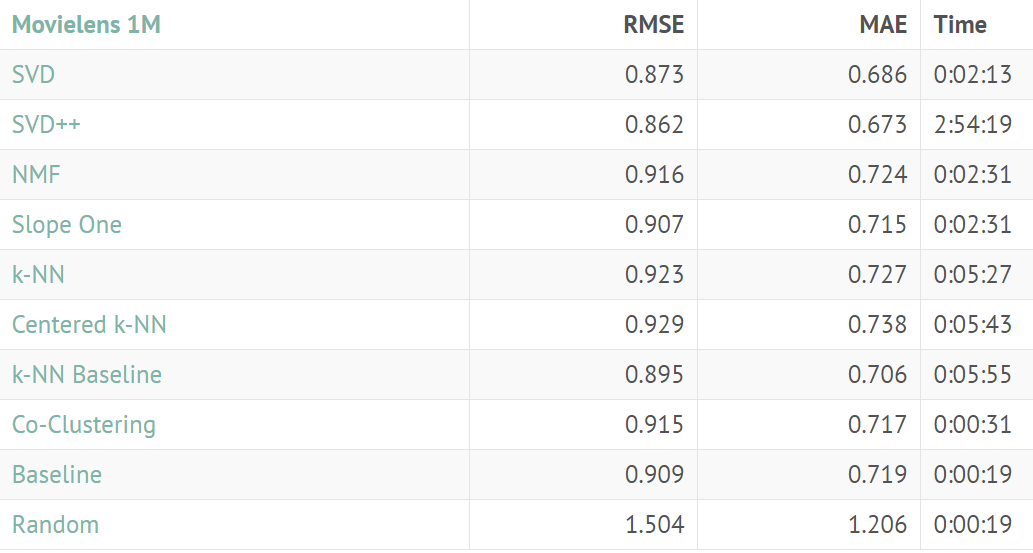

In [64]:
algo2 = KNNBasic(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo2.fit(trainset)
test_pred2 = algo2.test(testset)
accuracy.rmse(test_pred2, verbose=True)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9644


0.9644123683665734

In [70]:
algo3=SVD()
algo3.fit(trainset)
test_pred3 = algo3.test(testset)
accuracy.rmse(test_pred3, verbose=True)

RMSE: 0.8650


0.8650276095966828

In [71]:
cross_validate(algo3, data, measures=['RMSE'], cv=7, verbose=True, n_jobs=-1)

Evaluating RMSE of algorithm SVD on 7 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Mean    Std     
RMSE (testset)    0.8740  0.8685  0.8751  0.8654  0.8737  0.8604  0.8767  0.8705  0.0056  
Fit time          10.94   10.69   11.42   11.93   12.18   12.14   10.40   11.38   0.67    
Test time         0.23    0.27    0.31    0.27    0.27    0.24    0.24    0.26    0.03    


{'test_rmse': array([0.87400357, 0.86846484, 0.87514769, 0.86535538, 0.87365977,
        0.86035381, 0.87672091]),
 'fit_time': (10.93563199043274,
  10.691617012023926,
  11.41565990447998,
  11.932689189910889,
  12.175703048706055,
  12.137701749801636,
  10.400883674621582),
 'test_time': (0.22701311111450195,
  0.2740163803100586,
  0.3080179691314697,
  0.2720160484313965,
  0.26601672172546387,
  0.24129652976989746,
  0.23601341247558594)}

In [ ]:
algo4=SVDpp()
algo4.fit(trainset)
test_pred4 = algo4.test(testset)
accuracy.rmse(test_pred4, verbose=True)